# Principal Component Analysis

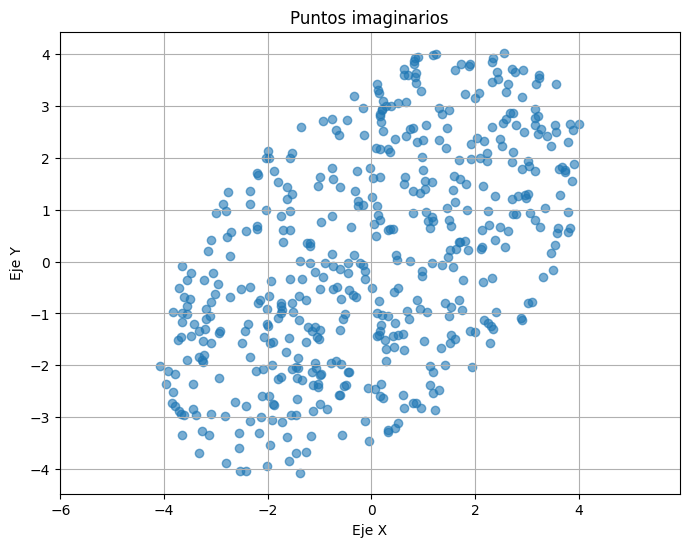

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración de parámetros de la elipse
num_points = 500
a = 5  # semi-eje mayor
b = 3  # semi-eje menor
angle = np.radians(45)  # ángulo de rotación en radianes

# Generar puntos aleatorios en una elipse
theta = np.random.uniform(0, 2 * np.pi, num_points)  # ángulo aleatorio
r = np.sqrt(np.random.uniform(0, 1, num_points))  # radio aleatorio (distribución uniforme)

# Ecuaciones paramétricas de la elipse
x = a * r * np.cos(theta)  # ecuación paramétrica para x
y = b * r * np.sin(theta)  # ecuación paramétrica para y

# Aplicar la rotación de 45 grados
x_rotated = x * np.cos(angle) - y * np.sin(angle)
y_rotated = x * np.sin(angle) + y * np.cos(angle)

data = pd.DataFrame({
    'X': x_rotated,
    'Y': y_rotated
})

# Graficar los puntos
plt.figure(figsize=(8, 6))
plt.scatter(x_rotated, y_rotated, alpha=0.6)
plt.title('Puntos imaginarios')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.axis('equal')  # para mantener la proporción
plt.grid()
plt.show()


In [ ]:
# Estandarizamos los datos
data_standardized = (data - data.mean()) / data.std()

### ¿Por qué estandarizar?  

PCA se basa en la varianza de los datos para identificar las direcciones (componentes principales) en las que los datos se dispersan. Si las variables están en diferentes escalas (por ejemplo, ingresos en miles, edades en años), aquellas con varianzas más altas dominarán el análisis. Estandarizar los datos asegura que todas las variables contribuyan de manera equitativa al cálculo de la varianza total.


* La matriz de correlación se utiliza cuando las variables están en diferentes escalas o tienen varianzas muy diferentes.

In [ ]:
# Calculamos la matriz de covarianza
cov_matrix = np.cov(data_standardized.T)
cov_matrix

array([[1.       , 0.5286995],
       [0.5286995, 1.       ]])

Para una matriz $A$, un vector es un vector propio si existe un número $\lambda$ (valor propio) tal que
$$Ax = \lambda x$$

In [ ]:
# Calculamos los valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors

(array([0.4713005, 1.5286995]),
 array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

In [ ]:
# Comprobamos que en efecto sean vectores propios
# Ax                                      \lambda x
cov_matrix @ eigenvectors[:, 0], eigenvalues[0] * eigenvectors[:, 0]

(array([-0.33325978,  0.33325978]), array([-0.33325978,  0.33325978]))

In [ ]:
# Ax                                      \lambda x
cov_matrix @ eigenvectors[:, 1], eigenvalues[1] * eigenvectors[:, 1]

(array([-1.08095378, -1.08095378]), array([-1.08095378, -1.08095378]))

In [ ]:
# ¿Cuál es el mayor valor propio?
sorted_indices = np.argsort(eigenvalues)[::-1]

# Ordenar los eigenvalues y eigenvectors
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Mostrar resultados
sorted_eigenvalues, sorted_eigenvectors

(array([1.5286995, 0.4713005]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [ ]:
sorted_eigenvectors[:, :2]

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [ ]:
# Seleccionamos el número de componentes principales a mantener
num_components = 2

# Transformamos los datos
pca_result = data_standardized.dot(sorted_eigenvectors[:, :num_components])

# Convertimos a DataFrame para visualizar
pca_df = pd.DataFrame(pca_result)
pca_df.columns = ['PC1', 'PC2']
pca_df.head()

,PC1,PC2
0,-2.248132,-0.471829
1,-0.341828,0.544413
2,0.454346,-1.226085
3,-0.822399,0.575556
4,-0.945266,-0.306151


La varianza explicada por la componente PC1 es $\frac{\lambda_1}{\lambda_1 + \lambda_2}$

In [ ]:
sorted_eigenvalues[0] * 100 / (sorted_eigenvalues[0] + sorted_eigenvalues[1])

np.float64(76.43497509186685)

La varianza explicada por la componente PC2 es $\frac{\lambda_2}{\lambda_1 + \lambda_2}$

In [ ]:
sorted_eigenvalues[1] * 100 / (sorted_eigenvalues[0] + sorted_eigenvalues[1])

np.float64(23.565024908133157)

Como se puede observar con una sola componente se logran dos objetivos:
1. Reducir la dimensión de 2 a 1
2. Capturar una gran cantidad de información del dataset, en este caso 72%

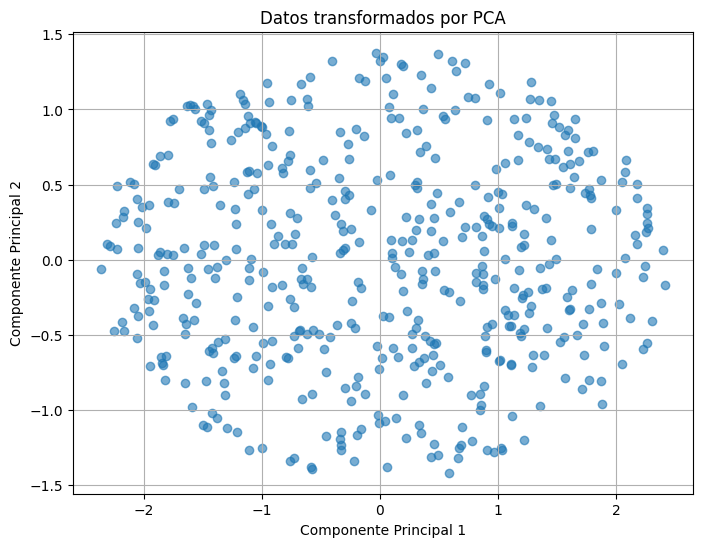

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6)
plt.title('Datos transformados por PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

n_components = 1
pca = PCA(n_components=n_components) # cambiar a 1
pca_result = pca.fit_transform(data_standardized)
pca_df = pd.DataFrame(pca_result)
pca_df.columns = [f"PC{i}" for i in range(1, n_components + 1)]
pca_df.head()

,PC1
0,2.248132
1,0.341828
2,-0.454346
3,0.822399
4,0.945266


In [ ]:
pca.components_ # eigenvectores

array([[0.70710678, 0.70710678]])

In [ ]:
pca.explained_variance_ # eigenvalores: Observar como cambia el signo

array([1.5286995])

In [ ]:
pca.explained_variance_ratio_ # Varianza explicada por cada componente

array([0.76434975])

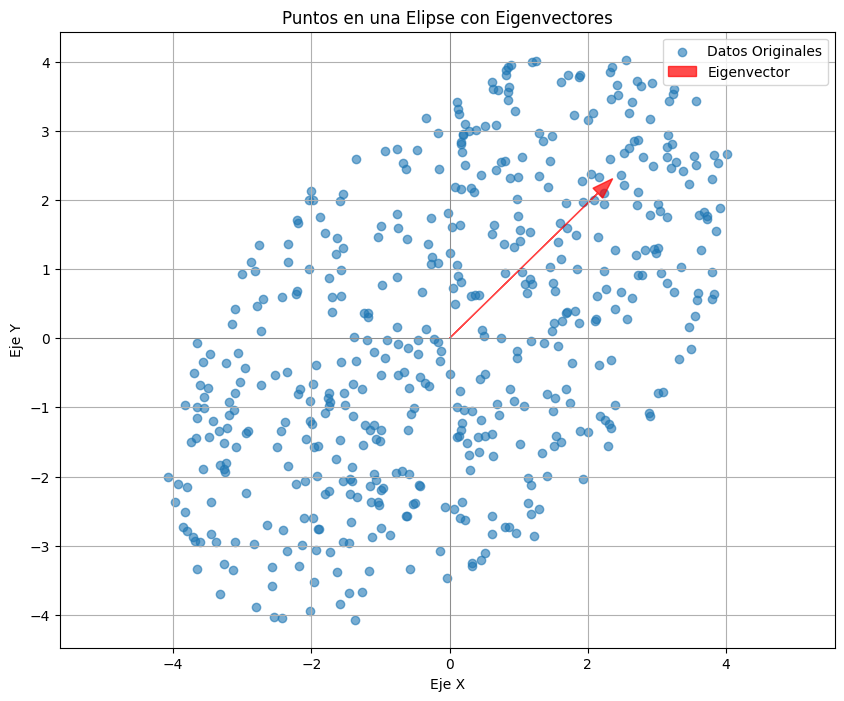

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=1) # cambiar a 1
pca.fit(data)

# Obtener los eigenvectores
eigenvectors = pca.components_.T  # Transponer para que estén en forma (dimensiones, componentes)

# Graficar los puntos
plt.figure(figsize=(10, 8))
plt.scatter(data['X'], data['Y'], alpha=0.6, label='Datos Originales')

# Añadir flechas para los eigenvectores
for i in range(eigenvectors.shape[1]):
    # Flecha desde el origen (0,0) en la dirección del eigenvector
    plt.arrow(0, 0, eigenvectors[0, i] * 3, eigenvectors[1, i] * 3,  # Escalamos para ver mejor
              head_width=0.2, head_length=0.3, color='r', alpha=0.7, label='Eigenvector' if i == 0 else "")

plt.xlim(-6, 6)
plt.ylim(-4, 4)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.title('Puntos en una Elipse con Eigenvectores')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.grid()
plt.legend()
plt.axis('equal')  # Para mantener la proporción
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [ ]:
wine_df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "yasserh/wine-quality-dataset",
    "WineQT.csv",
)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
data_standardized = StandardScaler().fit_transform(wine_df.drop(columns=["quality", "Id"]))
data_standardized.shape

(1143, 11)

In [ ]:
pca = PCA(n_components=4) # cambiar a 1
pca.fit(data_standardized)

PCA(n_components=4)

In [ ]:
pca.components_

array([[ 0.48533856, -0.22714317,  0.46007532,  0.17450629,  0.22487011,
        -0.04785179,  0.01506861,  0.39968417, -0.43284424,  0.23755529,
        -0.11879903],
       [-0.10232799,  0.28878641, -0.14650773,  0.2522617 ,  0.15313338,
         0.51702178,  0.57739283,  0.21753697, -0.00637351, -0.06228016,
        -0.38163504],
       [-0.12237612, -0.44371805,  0.24684311,  0.09135939, -0.05256247,
         0.42828836,  0.32342387, -0.33423846,  0.05992279,  0.30276801,
         0.47020106],
       [-0.23604559,  0.07728789, -0.06381775, -0.40726337,  0.65266911,
        -0.05080877, -0.0466689 , -0.16401907, -0.00672433,  0.52754686,
        -0.17995347]])

In [ ]:
pca.components_[0]

array([ 0.48533856, -0.22714317,  0.46007532,  0.17450629,  0.22487011,
       -0.04785179,  0.01506861,  0.39968417, -0.43284424,  0.23755529,
       -0.11879903])

In [ ]:
pca.explained_variance_

array([3.15892164, 1.87990611, 1.57503007, 1.21256564])

In [ ]:
pca.explained_variance_ratio_

array([0.28692345, 0.17075104, 0.14305928, 0.1101368 ])

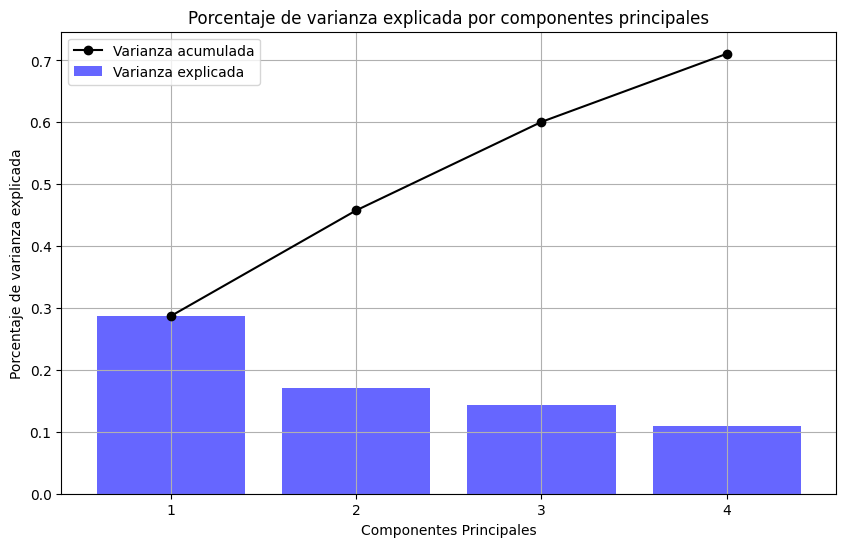

In [ ]:
explained_variance = pca.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color='b', label='Varianza explicada')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='k', label='Varianza acumulada')

plt.title('Porcentaje de varianza explicada por componentes principales')
plt.xlabel('Componentes Principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.legend()
plt.show()

# Kernel PCA

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)

Text(0.5, 1.0, 'Training data')

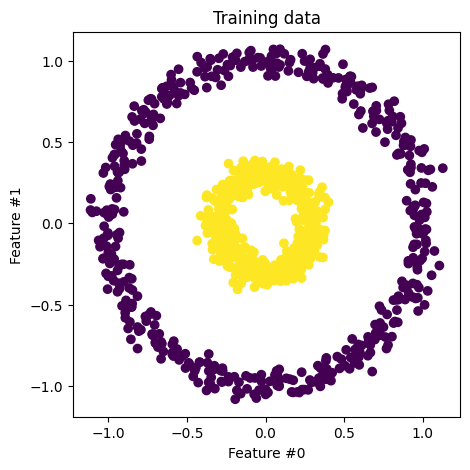

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

_, train_ax = plt.subplots(ncols=1, sharex=True, sharey=True, figsize=(5, 5))

train_ax.scatter(X[:, 0], X[:, 1], c=y)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")


In [ ]:
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel

# Calcular la matriz de kernel
K = rbf_kernel(X, gamma=5)  # Puedes ajustar gamma según sea necesario
#K = polynomial_kernel(X, degree=2, coef0=0, gamma=100)
#K = linear_kernel(X)
K.shape

(1000, 1000)

In [ ]:
# Centrar la matriz de kernel
n = K.shape[0]
one_n = np.ones((n, n)) / n
K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n

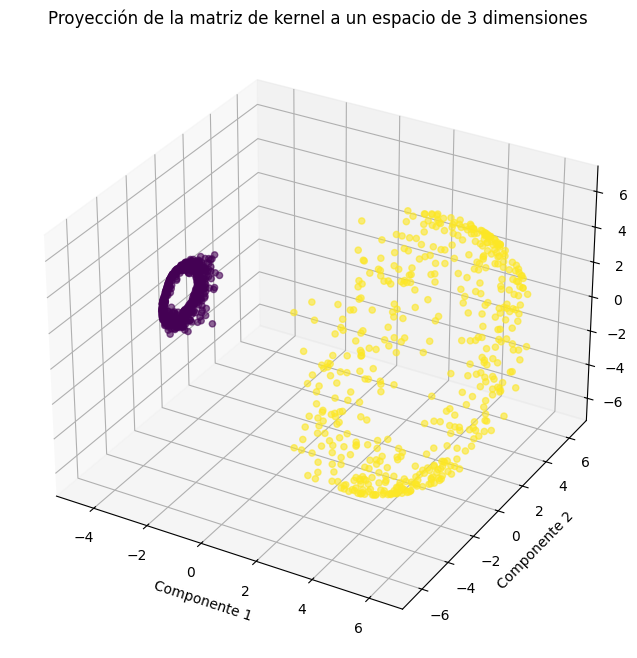

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics.pairwise import rbf_kernel


# Visualizar la matriz de kernel (en 3D usando PCA para reducir dimensiones)
# Para visualizar K en 3D, haremos una reducción a 3 dimensiones utilizando PCA estándar
from sklearn.decomposition import PCA, KernelPCA

# Aplicar PCA para reducir a 3 dimensiones
pca = PCA(n_components=3)
K_3D = pca.fit_transform(K_centered)

# Graficar la proyección de la matriz de kernel en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos transformados
ax.scatter(K_3D[:, 0], K_3D[:, 1], K_3D[:, 2], c=y, cmap='viridis', alpha=0.6)
ax.set_title('Proyección de la matriz de kernel a un espacio de 3 dimensiones')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
plt.show()


In [ ]:
# Calcular eigenvalores y eigenvectores
eigenvalues, eigenvectors = np.linalg.eigh(K_centered)

In [ ]:
# Seleccionar las componentes principales
sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices de los eigenvalores en orden descendente
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Elegir las k componentes principales
k = 2  # Número de componentes principales
principal_components = sorted_eigenvectors[:, :k]


In [ ]:
# Proyectar los datos originales al nuevo espacio
X_kpca = K @ principal_components

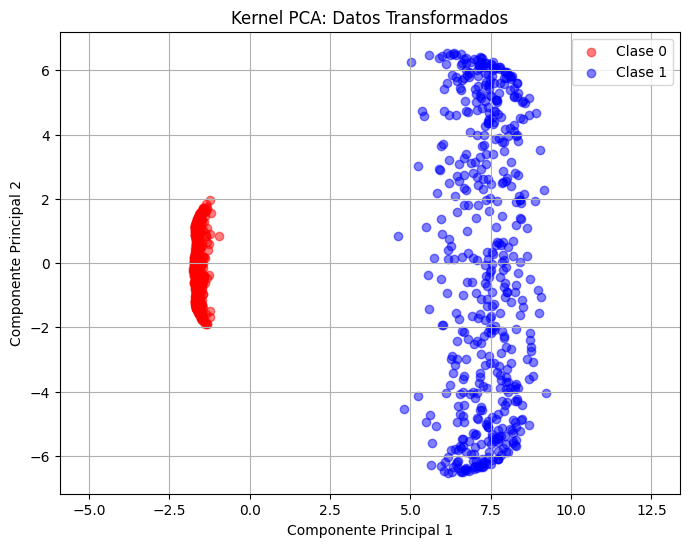

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color='red', label='Clase 0', alpha=0.5)
plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color='blue', label='Clase 1', alpha=0.5)
plt.title('Kernel PCA: Datos Transformados')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()


In [ ]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_

array([0.5011154, 0.4988846])

In [ ]:
eigenvalues = kpca.eigenvalues_
explained_variance = eigenvalues / np.sum(eigenvalues)
explained_variance

array([0.50183065, 0.49816935])

Varianza explicada por PCA estándar:  [0.5011154 0.4988846]


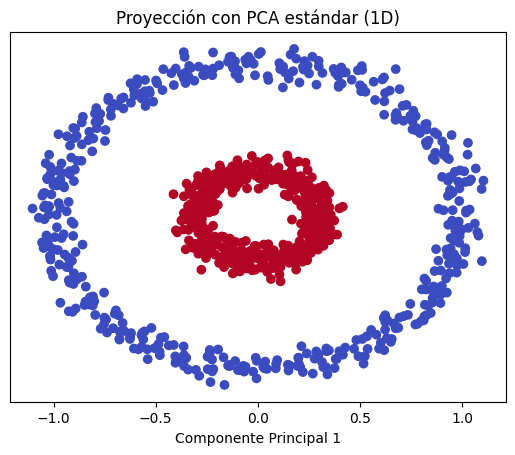

In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA estándar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Varianza explicada por PCA estándar
explained_variance_pca = pca.explained_variance_ratio_

print("Varianza explicada por PCA estándar: ", explained_variance_pca)

plt.scatter(X_pca[:, 0],
            X_pca[:, 1],
            #[0] * len(X_pca),
            c=y, cmap='coolwarm')
plt.title('Proyección con PCA estándar (1D)')
plt.xlabel('Componente Principal 1')
plt.yticks([])  # Ocultar el eje Y ya que es una proyección en 1D
plt.show()

Aproximación de la varianza explicada por Kernel PCA:  [0.5852002 0.4147998]


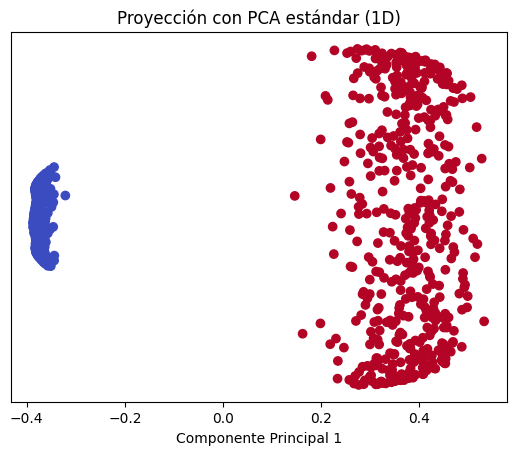

In [ ]:
from sklearn.decomposition import KernelPCA

# Aplicar Kernel PCA con kernel RBF (Radial Basis Function)
kpca = KernelPCA(kernel='rbf', n_components=2, gamma=5)
X_kpca = kpca.fit_transform(X)

# Eigenvalores en Kernel PCA
eigenvalues_kpca = kpca.eigenvalues_
explained_variance_kpca = eigenvalues_kpca / np.sum(eigenvalues_kpca)

print("Aproximación de la varianza explicada por Kernel PCA: ", explained_variance_kpca)

plt.scatter(X_kpca[:, 0],
            X_kpca[:, 1],
            #[0] * len(X_kpca),
            c=y, cmap='coolwarm')
plt.title('Proyección con PCA estándar (1D)')
plt.xlabel('Componente Principal 1')
plt.yticks([])  # Ocultar el eje Y ya que es una proyección en 1D
plt.show()
